# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project-2: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))

print()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print()
print("Validation Set: {} samples".format(len(X_valid)))

print()
print("X_valid.shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

print()
print("Test Set:       {} samples".format(len(X_test)))

print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Image Shape: (32, 32, 3)

Training Set:   34799 samples

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)

Validation Set: 4410 samples

X_valid.shape: (4410, 32, 32, 3)
y_valid shape: (4410,)

Test Set:       12630 samples

X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_validation = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

#Shape of an traffic sign image
image_shape = X_train[0].shape

# Total number of unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


0. Speed limit (20km/h) - Samples: 180


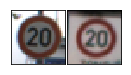

1. Speed limit (30km/h) - Samples: 1980


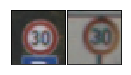

2. Speed limit (50km/h) - Samples: 2010


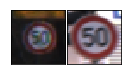

3. Speed limit (60km/h) - Samples: 1260


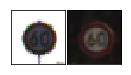

4. Speed limit (70km/h) - Samples: 1770


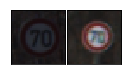

5. Speed limit (80km/h) - Samples: 1650


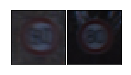

6. End of speed limit (80km/h) - Samples: 360


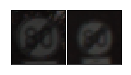

7. Speed limit (100km/h) - Samples: 1290


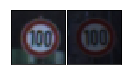

8. Speed limit (120km/h) - Samples: 1260


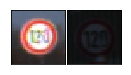

9. No passing - Samples: 1320


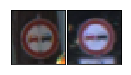

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


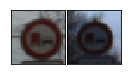

11. Right-of-way at the next intersection - Samples: 1170


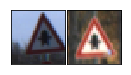

12. Priority road - Samples: 1890


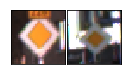

13. Yield - Samples: 1920


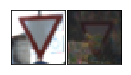

14. Stop - Samples: 690


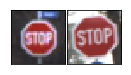

15. No vehicles - Samples: 540


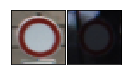

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


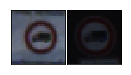

17. No entry - Samples: 990


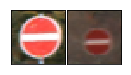

18. General caution - Samples: 1080


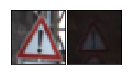

19. Dangerous curve to the left - Samples: 180


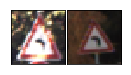

20. Dangerous curve to the right - Samples: 300


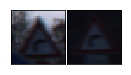

21. Double curve - Samples: 270


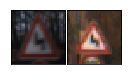

22. Bumpy road - Samples: 330


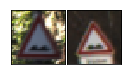

23. Slippery road - Samples: 450


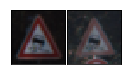

24. Road narrows on the right - Samples: 240


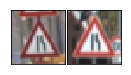

25. Road work - Samples: 1350


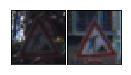

26. Traffic signals - Samples: 540


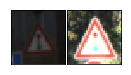

27. Pedestrians - Samples: 210


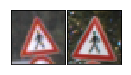

28. Children crossing - Samples: 480


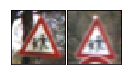

29. Bicycles crossing - Samples: 240


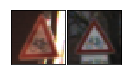

30. Beware of ice/snow - Samples: 390


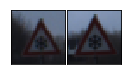

31. Wild animals crossing - Samples: 690


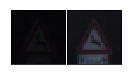

32. End of all speed and passing limits - Samples: 210


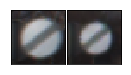

33. Turn right ahead - Samples: 599


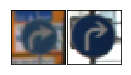

34. Turn left ahead - Samples: 360


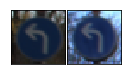

35. Ahead only - Samples: 1080


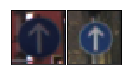

36. Go straight or right - Samples: 330


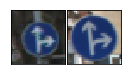

37. Go straight or left - Samples: 180


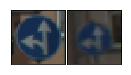

38. Keep right - Samples: 1860


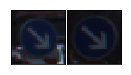

39. Keep left - Samples: 270


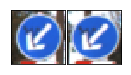

40. Roundabout mandatory - Samples: 300


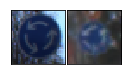

41. End of no passing - Samples: 210


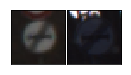

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


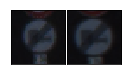

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, examples_per_sign=2, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()

plotImages(X_train, y_train)

### Plot the Histogram 

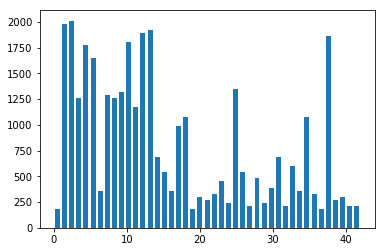

In [4]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def getGrayScale(img):
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return np.resize(YCrCb[:,:,0], (32,32,1))

def normalizeImage(img):
    a = -0.5
    b = 0.5
    minimum = 0
    maximum = 255
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(normalizeImage(getGrayScale(img)))
    return ret_array

X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)

0. Speed limit (20km/h) - Samples: 180


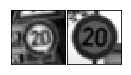

1. Speed limit (30km/h) - Samples: 1980


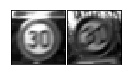

2. Speed limit (50km/h) - Samples: 2010


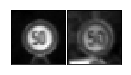

3. Speed limit (60km/h) - Samples: 1260


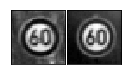

4. Speed limit (70km/h) - Samples: 1770


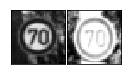

5. Speed limit (80km/h) - Samples: 1650


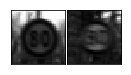

6. End of speed limit (80km/h) - Samples: 360


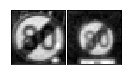

7. Speed limit (100km/h) - Samples: 1290


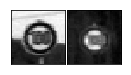

8. Speed limit (120km/h) - Samples: 1260


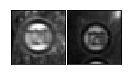

9. No passing - Samples: 1320


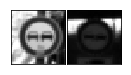

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


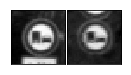

11. Right-of-way at the next intersection - Samples: 1170


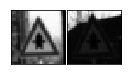

12. Priority road - Samples: 1890


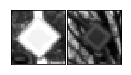

13. Yield - Samples: 1920


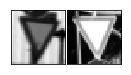

14. Stop - Samples: 690


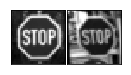

15. No vehicles - Samples: 540


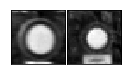

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


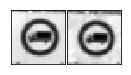

17. No entry - Samples: 990


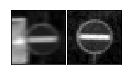

18. General caution - Samples: 1080


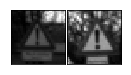

19. Dangerous curve to the left - Samples: 180


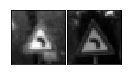

20. Dangerous curve to the right - Samples: 300


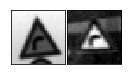

21. Double curve - Samples: 270


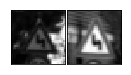

22. Bumpy road - Samples: 330


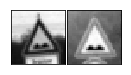

23. Slippery road - Samples: 450


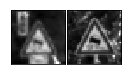

24. Road narrows on the right - Samples: 240


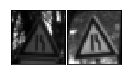

25. Road work - Samples: 1350


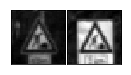

26. Traffic signals - Samples: 540


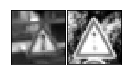

27. Pedestrians - Samples: 210


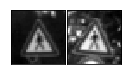

28. Children crossing - Samples: 480


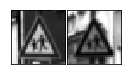

29. Bicycles crossing - Samples: 240


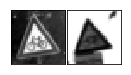

30. Beware of ice/snow - Samples: 390


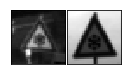

31. Wild animals crossing - Samples: 690


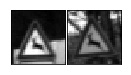

32. End of all speed and passing limits - Samples: 210


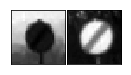

33. Turn right ahead - Samples: 599


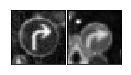

34. Turn left ahead - Samples: 360


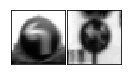

35. Ahead only - Samples: 1080


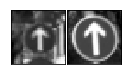

36. Go straight or right - Samples: 330


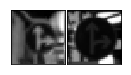

37. Go straight or left - Samples: 180


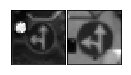

38. Keep right - Samples: 1860


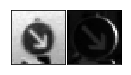

39. Keep left - Samples: 270


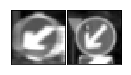

40. Roundabout mandatory - Samples: 300


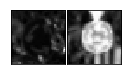

41. End of no passing - Samples: 210


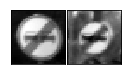

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


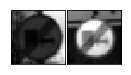

In [6]:
plotImages(X_train, y_train, squeeze=True, cmap='gray')

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x, num_labels):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros([48]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros([96]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([172]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Max Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Flatten. Input = 2x2x172. Output = 688.
    fc1 = flatten(conv3)
    
    # Fully Connected. Input = 688. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
    fc2 = tf.nn.relu(fc2)

    # Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, num_labels), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([num_labels]))
    logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)
    
    return logits


### Features and Labels

Train LeNet to classify traffic sign data.
x is a placeholder for a batch of input images. 
y is a placeholder for a batch of output labels.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [9]:
rate = 0.001

logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 35
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples




In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1), end='')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ... Validation Accuracy = 0.862
EPOCH 2 ... Validation Accuracy = 0.909
EPOCH 3 ... Validation Accuracy = 0.917
EPOCH 4 ... Validation Accuracy = 0.929
EPOCH 5 ... Validation Accuracy = 0.923
EPOCH 6 ... Validation Accuracy = 0.935
EPOCH 7 ... Validation Accuracy = 0.939
EPOCH 8 ... Validation Accuracy = 0.946
EPOCH 9 ... Validation Accuracy = 0.931
EPOCH 10 ... Validation Accuracy = 0.939
EPOCH 11 ... Validation Accuracy = 0.934
EPOCH 12 ... Validation Accuracy = 0.956
EPOCH 13 ... Validation Accuracy = 0.938
EPOCH 14 ... Validation Accuracy = 0.934
EPOCH 15 ... Validation Accuracy = 0.927
EPOCH 16 ... Validation Accuracy = 0.950
EPOCH 17 ... Validation Accuracy = 0.945
EPOCH 18 ... Validation Accuracy = 0.956
EPOCH 19 ... Validation Accuracy = 0.959
EPOCH 20 ... Validation Accuracy = 0.956
EPOCH 21 ... Validation Accuracy = 0.959
EPOCH 22 ... Validation Accuracy = 0.960
EPOCH 23 ... Validation Accuracy = 0.960
EPOCH 24 ... Validation Accuracy = 0.960
EPOCH 25 ... 

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))    


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.939


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.